In [1]:
import numpy as np
import pickle
import conversion_utilities as cu
import i_log_polar as ilp
import timeit
import itertools
import os
import shutil
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
reload(ilp)

<module 'i_log_polar' from 'i_log_polar.py'>

In [4]:
input_file = open( "ior_beta_dict.pkl", "rb" )
beta_dict = pickle.load(input_file)
input_file.close()
input_file = open( "fixed_theta_dict.pkl", "rb" )
theta_dict = pickle.load(input_file)
input_file.close()

In [5]:
beta_site_list = []
for neuron in beta_dict.keys():
    site_code = neuron[:3]
    if not(site_code in beta_site_list):
        beta_site_list.append(site_code)
beta_site_num_list = [int(site) for site in beta_site_list]

In [16]:
full_name_list = []
full_N_val_list = []
full_I_r_list = []
full_I_u_list = []
full_I_mhash_list = []
full_I_uhash_list = []
for l in range(len(beta_site_list)):
    site_num = beta_site_num_list[l]
    site = beta_site_list[l]
    #path_to_data = path_list[l]
    path_to_data = 'final_data/'
    trial_data = cu.get_full_site(site_num,path_to_data)
    if len(trial_data) > 2:
        name_list,N_val_list,I_r_list,I_u_list,I_mhash_list,I_uhash_list = ilp.I_loop_full(trial_data,beta_dict,theta_dict)
        full_name_list += name_list
        full_N_val_list += N_val_list
        full_I_r_list += I_r_list
        full_I_u_list += I_u_list
        full_I_mhash_list += I_mhash_list
        full_I_uhash_list += I_uhash_list
    print "finished site " +site+ ", {} out of {}, {} datapoints".format(l+1,len(beta_site_list),len(full_I_r_list))

4 neurons for site 982
finished site 982, 1 out of 15, 11 datapoints
3 neurons for site 946
finished site 946, 2 out of 15, 15 datapoints
4 neurons for site 733
finished site 733, 3 out of 15, 26 datapoints
5 neurons for site 950
finished site 950, 4 out of 15, 52 datapoints
5 neurons for site 800
finished site 800, 5 out of 15, 78 datapoints
6 neurons for site 776
finished site 776, 6 out of 15, 135 datapoints
6 neurons for site 761
finished site 761, 7 out of 15, 192 datapoints
6 neurons for site 804
finished site 804, 8 out of 15, 249 datapoints
3 neurons for site 883
finished site 883, 9 out of 15, 253 datapoints
1 neurons for site 688
finished site 688, 10 out of 15, 253 datapoints
7 neurons for site 772
finished site 772, 11 out of 15, 373 datapoints
1 neurons for site 854
finished site 854, 12 out of 15, 373 datapoints
1 neurons for site 672
finished site 672, 13 out of 15, 373 datapoints
5 neurons for site 757
finished site 757, 14 out of 15, 399 datapoints
4 neurons for site 7

In [17]:
both_data_dict = {"subsets":full_name_list,"N":full_N_val_list,"I_r":full_I_r_list,"I_u":full_I_u_list,"I_mhash":full_I_mhash_list,"I_uhash":full_I_uhash_list}
df = pd.DataFrame.from_dict(both_data_dict)
proper_df = df.set_index("subsets")
proper_df.to_pickle("log_polar_i.pkl")

In [13]:
df = pd.DataFrame.from_dict(both_data_dict)


In [16]:
proper_df = df.set_index("subsets")
proper_df.to_pickle("theta_and_beta_fixed.pkl")

In [15]:
proper_df

,I_count,I_mhash,I_r,I_uhash,N
subsets,,,,,
"[982_6, 982_5]",2.961344,4.198749,4.198749,4.198749,2
"[982_6, 982_3]",1.459705,2.150398,2.150398,2.150398,2
"[982_6, 982_2]",0.816940,2.146390,2.146390,2.146390,2
"[982_5, 982_3]",2.203526,3.236149,3.236149,3.236149,2
"[982_5, 982_2]",2.418368,3.504604,3.504604,3.504604,2
"[982_3, 982_2]",0.460637,1.397731,1.397731,1.397731,2
"[982_6, 982_5, 982_3]",3.473882,6.416304,6.416304,6.416304,3
"[982_6, 982_5, 982_2]",3.159436,6.233663,6.233663,6.233663,3
"[982_6, 982_3, 982_2]",1.095158,2.220474,3.114836,3.114836,3


In [4]:
theta_dict

{'672_1': 1.3647689352432257,
 '688_1': 0.9305467253103048,
 '733_2': 2.91227558849951,
 '733_3': 0.4031221879916343,
 '733_4': 1.6219205112443142,
 '733_5': 2.13731623935824,
 '757_1': 0.9778276947468311,
 '757_2': 1.3107754295035294,
 '757_3': 1.842736077548133,
 '757_4': 1.8445128227266632,
 '757_5': 1.4800042991061515,
 '759_1': 1.4377935111466686,
 '759_2': 1.3652977700065803,
 '759_3': 1.0792278336291976,
 '759_6': 1.560781627546953,
 '761_1': 1.5368357102095909,
 '761_10': 2.7122783095134797,
 '761_11': 1.7807035852737505,
 '761_2': 1.481416270471015,
 '761_3': 1.2208246505142455,
 '761_4': 1.0263513386107774,
 '772_1': 0.7967654928156874,
 '772_2': 1.5933843779742072,
 '772_3': 0.7509488546215842,
 '772_4': 1.4193087290387967,
 '772_5': 1.3342012387237974,
 '772_6': 1.0397554672660938,
 '772_8': 1.2498128240606194,
 '776_12': 2.6027466816460714,
 '776_2': 1.196707690910188,
 '776_3': 1.8543215731228713,
 '776_4': 2.968780623032827,
 '776_5': 1.2455210594299655,
 '776_8': 1.2896

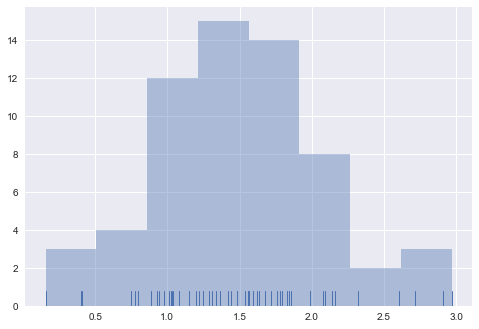

In [11]:
sns.distplot(theta_dict.values(),kde=False,rug=True)
plt.show()

In [4]:
import numpy as np
x = np.random.randint(0,9,10000)
x.shape

(10000,)

In [6]:
import pandas as pd
import pickle as pkl

In [10]:
df = pd.read_pickle('numpy_info.pkl')

,subset,Site,N,Repeats,Filename
0,"(982_6, 982_5)",982,2,110,numpy_data/n982_6_n982_5.npy
1,"(982_6, 982_3)",982,2,110,numpy_data/n982_6_n982_3.npy
2,"(982_6, 982_2)",982,2,110,numpy_data/n982_6_n982_2.npy
3,"(982_5, 982_3)",982,2,110,numpy_data/n982_5_n982_3.npy
4,"(982_5, 982_2)",982,2,110,numpy_data/n982_5_n982_2.npy
5,"(982_3, 982_2)",982,2,110,numpy_data/n982_3_n982_2.npy
6,"(982_6, 982_5, 982_3)",982,3,110,numpy_data/n982_6_n982_5_n982_3.npy
7,"(982_6, 982_5, 982_2)",982,3,110,numpy_data/n982_6_n982_5_n982_2.npy
8,"(982_6, 982_3, 982_2)",982,3,110,numpy_data/n982_6_n982_3_n982_2.npy
9,"(982_5, 982_3, 982_2)",982,3,110,numpy_data/n982_5_n982_3_n982_2.npy
